In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pareto
from scipy.stats import uniform

In [73]:
def random_direction(N):
    θ = uniform.rvs(0, 2*np.pi, size=N-1)
    dirs = np.column_stack((np.cos(θ), np.sin(θ)))
    dirs = np.vstack((np.zeros(2), dirs))
    return dirs

# Generate the length of time and space displacement
alpha = 1.5 # [0.5,1,1.5,2,3]
beta = 1 # [0.5,1,1.5]
Δt_min = 1
Δx_min = 1

def draw_lengths(alpha, beta, N, Δt_min=1, Δx_min=1):
    Δx = np.array(pareto.rvs(alpha,size=N))
    Δt = np.array(pareto.rvs(beta,size=N))

    Δx[Δx < Δx_min] = 0
    Δt[Δt < Δt_min] = 0
    return Δx,Δt

def Random_Walk(alpha, beta, steps, Δt_min=1, Δx_min=1):
    directions = random_direction(steps)
    displacements, times = draw_lengths(alpha, beta, steps, Δt_min, Δx_min)
    positions = np.cumsum(directions*displacements[:,np.newaxis],axis=0)
    times = np.cumsum(times)
    return positions, times

In [82]:
positions, t = Random_Walk(alpha,beta,200)

In [87]:
positions2, t = Random_Walk(alpha,beta,200)

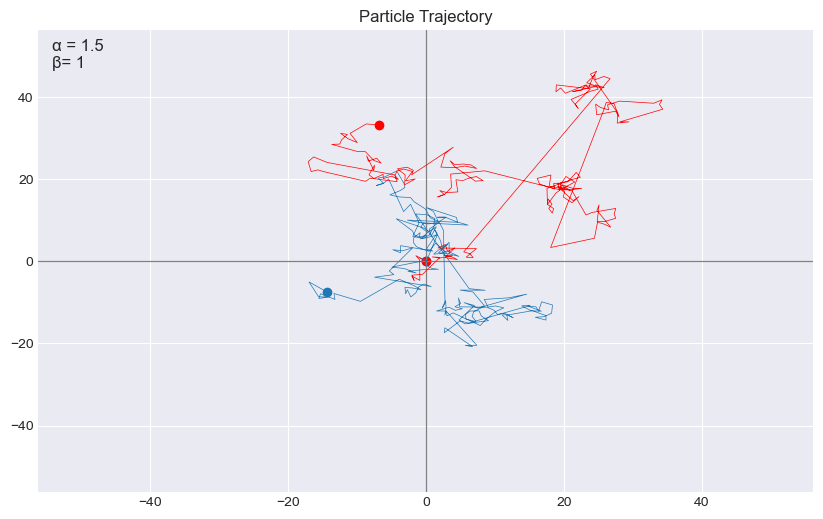

In [94]:
#Set a seaborn style
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(10, 6))

# Center the zero position on the y-axis
plt.axhline(0, color='gray', linestyle='-',lw=0.9)
plt.axvline(0, color='gray', linestyle='-',lw=0.9)

# Set the y-axis limits to center the zero position
y_min = positions2[:,1].min()
y_max = positions2[:,1].max()
y_range = max(abs(y_min), abs(y_max))
plt.ylim(-y_range-10, y_range+10)

# Set the x-axis limits to center the zero position
x_min = positions2[:,0].min()
x_max = positions2[:,1].max()
x_range = max(abs(x_min), abs(x_max))
plt.xlim(-x_range-10, x_range+10)

# Plot the trajectory of the particle
plt.plot(positions[:,0],positions[:,1],lw=0.5)
plt.plot(positions2[:,0],positions2[:,1],lw=0.5,color='red')

plt.scatter([positions[0,0],positions[-1,0]],[positions[0,1],positions[-1,1]])
plt.scatter([positions2[0,0],positions2[-1,0]],[positions2[0,1],positions2[-1,1]],color='red')

# Labeling the plot
plt.title('Particle Trajectory')
plt.text(-x_range-8,y_range+8, f'α = {alpha}\nβ= {beta}', ha='left', va='top', size= 12)
plt.grid(True)

# Show the plot
plt.savefig('Rand_Wlk_2Particles.png',format='png')
plt.show()

Compute the mean square eviation of the walker as a position of time

In [90]:
def get_position(positions,times,t):
    cutoff_index = np.searchsorted(times,t)
    return positions[cutoff_index]

In [95]:
# Simulate random walks
N = 1000
steps = 1000
alpha = 1.5# [0.5,1,1.5,2,3]
beta = 1# [0.5,1,1.5]

R_walks = []
Times = []

for i in range(N):
    trajectory, times = Random_Walk(alpha,beta,steps)
    R_walks.append(trajectory)
    Times.append(times)    

In [104]:
# Find the mean-squared deviation
tl = 1000
T_max = min([t[-1] for t in Times])
T = np.linspace(0,T_max,tl)
MSD = []
x_of_ts = []

for t in T:
    x_of_ts = [get_position(R_walks[i], Times[i], t) for i in range(steps)]
    msd_of_t = np.var(x_of_ts)
    MSD.append(msd_of_t)

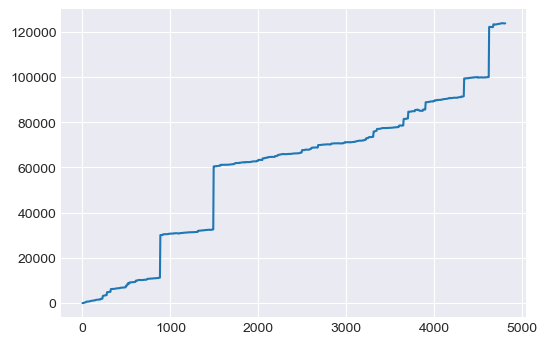

In [108]:
plt.figure(figsize=(6,4))
plt.plot(T,MSD)
plt.show()